In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 12,10
plt.style.use('fivethirtyeight')
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('GlobalTemperatures.csv',index_col=0,parse_dates=True)

In [3]:
df.head(10)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [5]:
df = df.LandAndOceanAverageTemperature['1850':]

In [6]:
df.head(10)

dt
1850-01-01    12.833
1850-02-01    13.588
1850-03-01    14.043
1850-04-01    14.667
1850-05-01    15.507
1850-06-01    16.353
1850-07-01    16.783
1850-08-01    16.718
1850-09-01    15.886
1850-10-01    14.831
Name: LandAndOceanAverageTemperature, dtype: float64

In [7]:
df.isnull().sum()

0

Text(0, 0.5, 'Average Temperature')

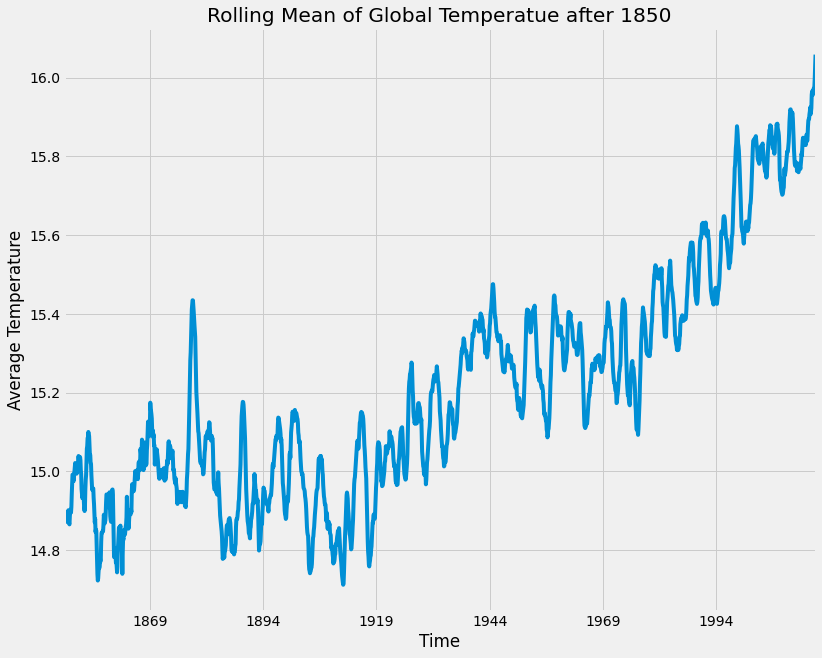

In [8]:
mean = df.rolling(12).mean()
mean.plot()
plt.title('Rolling Mean of Global Temperatue after 1850')
plt.xlabel('Time')
plt.ylabel('Average Temperature')


Text(0, 0.5, 'Average Temperature')

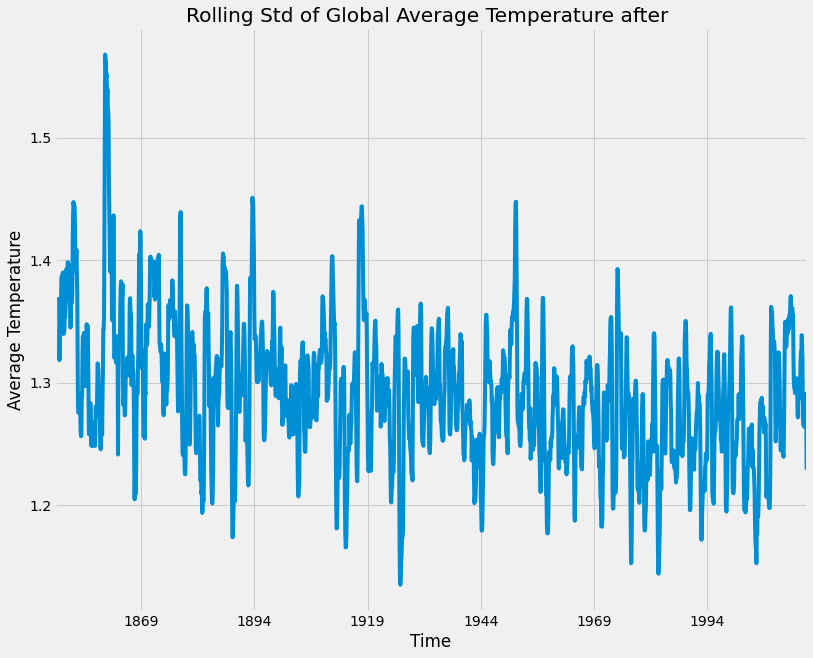

In [9]:
var = df.rolling(12).std()
var.plot()
plt.title('Rolling Std of Global Average Temperature after ')
plt.xlabel('Time')
plt.ylabel('Average Temperature')

The Series is Non-Stationary: So we will take difference it

Text(0.5, 0, 'Time')

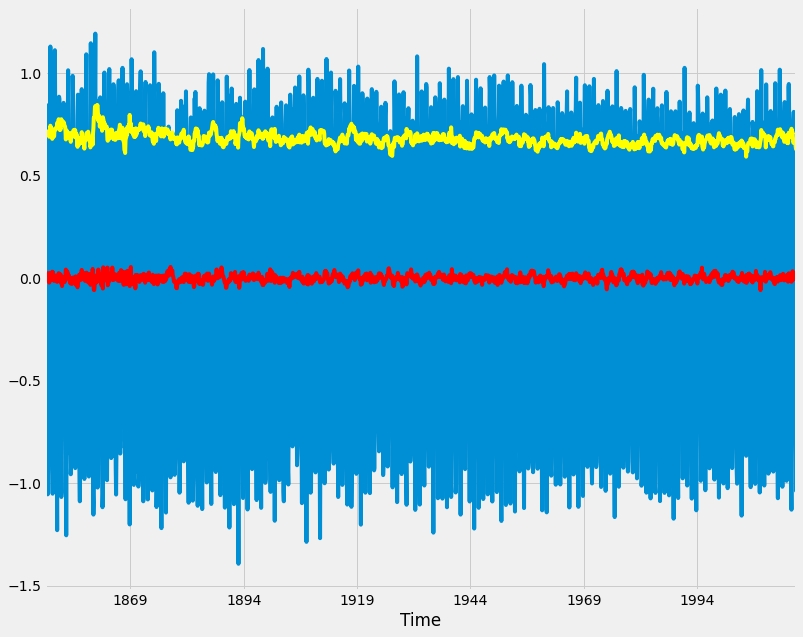

In [10]:
diff = df.diff().dropna()
mean_diff = diff.rolling(12).mean()
var_diff = diff.rolling(12).std()
diff.plot()
mean_diff.plot(c='red')
var_diff.plot(c='yellow')
plt.xlabel('Time')

In [11]:
dftest = sm.tsa.adfuller(diff,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags Used','Number of observations'])
for key, value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key]=value
print(dfoutput)


Test Statistic           -1.179241e+01
p-value                   9.755605e-22
Lags Used                 2.500000e+01
Number of observations    1.965000e+03
Critical Value(1%)       -3.433682e+00
Critical Value(5%)       -2.863012e+00
Critical Value(10%)      -2.567554e+00
dtype: float64


Autocorrelation Function

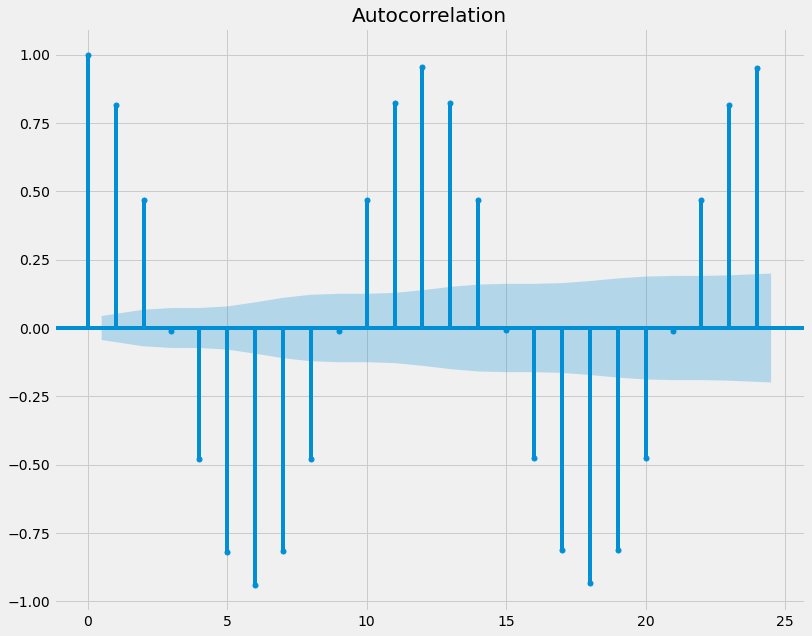

In [12]:
sm.tsa.graphics.plot_acf(diff,lags=np.arange(0,25,1));

Partial Autocorrelation Function

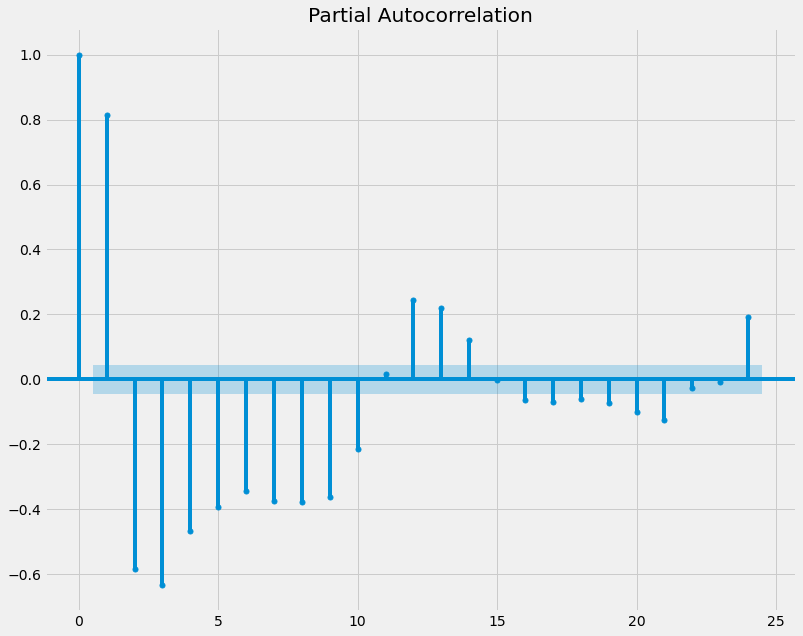

In [13]:
sm.tsa.graphics.plot_pacf(diff,lags= np.arange(0,25,1));

In [14]:
sarima = sm.tsa.SARIMAX(df,order=(3,1,0),seasonal_order=(0,0,0,12))
model = sarima.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:     LandAndOceanAverageTemperature   No. Observations:                 1992
Model:                           SARIMAX(3, 1, 0)   Log Likelihood                  30.816
Date:                            Sun, 13 Sep 2020   AIC                            -53.631
Time:                                    18:57:37   BIC                            -31.246
Sample:                                01-01-1850   HQIC                           -45.410
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9223      0.016     58.616      0.000       0.891       0.953
ar.L2          0.2317      0.023   

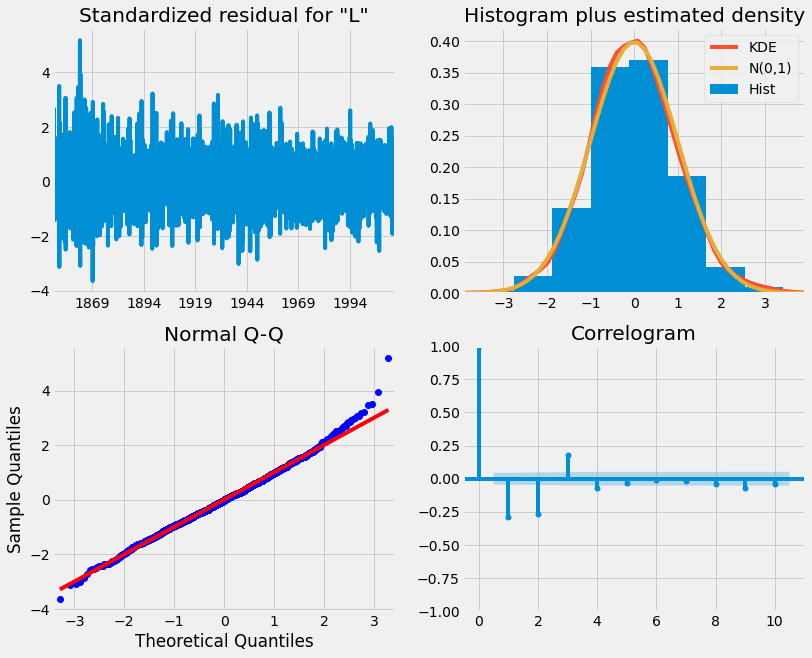

In [15]:
model.plot_diagnostics();